In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

In [4]:
iris_data = datasets.load_iris()

In [5]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris_df = pd.DataFrame(data = iris_data.data,columns=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'])

In [11]:
iris_df['target'] = iris_data.target

In [12]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
X = iris_df.drop(labels='target',axis=1)
y = iris_df[['target']]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=12)

### model training

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 3)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

### to plot the tree

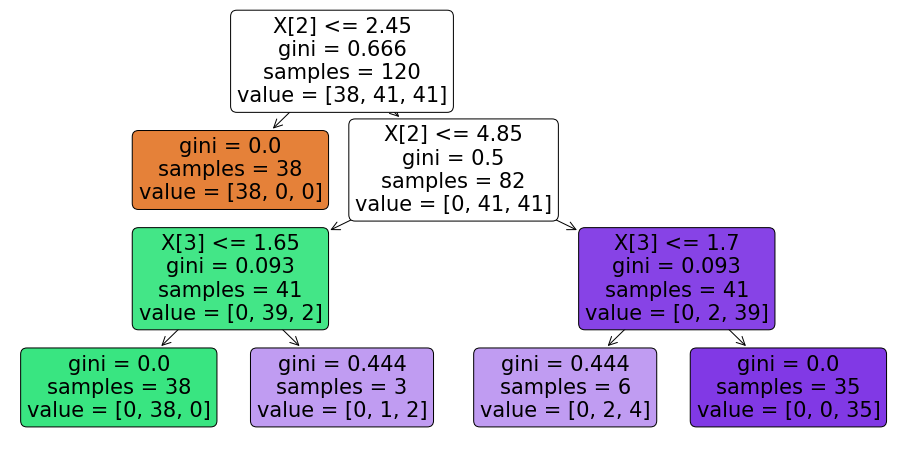

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))
plot_tree(dt_model,filled=True,rounded=True)
plt.show()

In [41]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
accuracy_score(y_train,y_pred_train)

0.975

In [44]:
confusion_matrix(y_train,y_pred_train)

array([[38,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 41]])

In [45]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        41

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.97      0.97       120



In [46]:
accuracy_score(y_test,y_pred_test)

0.9333333333333333

In [47]:
confusion_matrix(y_test,y_pred_test)

array([[12,  0,  0],
       [ 0,  7,  2],
       [ 0,  0,  9]])

In [48]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



In [49]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(20),},)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])})

In [50]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [51]:
grid_search.best_score_

0.95